<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/00_pricedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주가 데이터 가져오기

## OHLV
OHLV는 주식 시장에서 주식의 4가지 핵심 가격 정보를 나타내는 용어,
Open(시가), High(고가), Low(저가), Volume(거래량)의 첫 글자를 딴 약어입니다. 이 용어는 주가의 일일 움직임과 시장의 참여도를 한눈에 파악하는 데 사용됨.

* Open (시가): 특정 거래일의 시작 가격.
* High (고가): 특정 거래일 동안 기록된 최고 가격.
* Low (저가): 특정 거래일 동안 기록된 최저 가격.
* Volume (거래량): 특정 거래일 동안 매매된 주식의 총량.


OHLV 정보는 주식 차트에서 캔들스틱 차트와 함께 시각화되어, 투자자들이 특정 기간의 주가 변동을 분석하고 거래 전략을 수립하는 데 도움을 줌

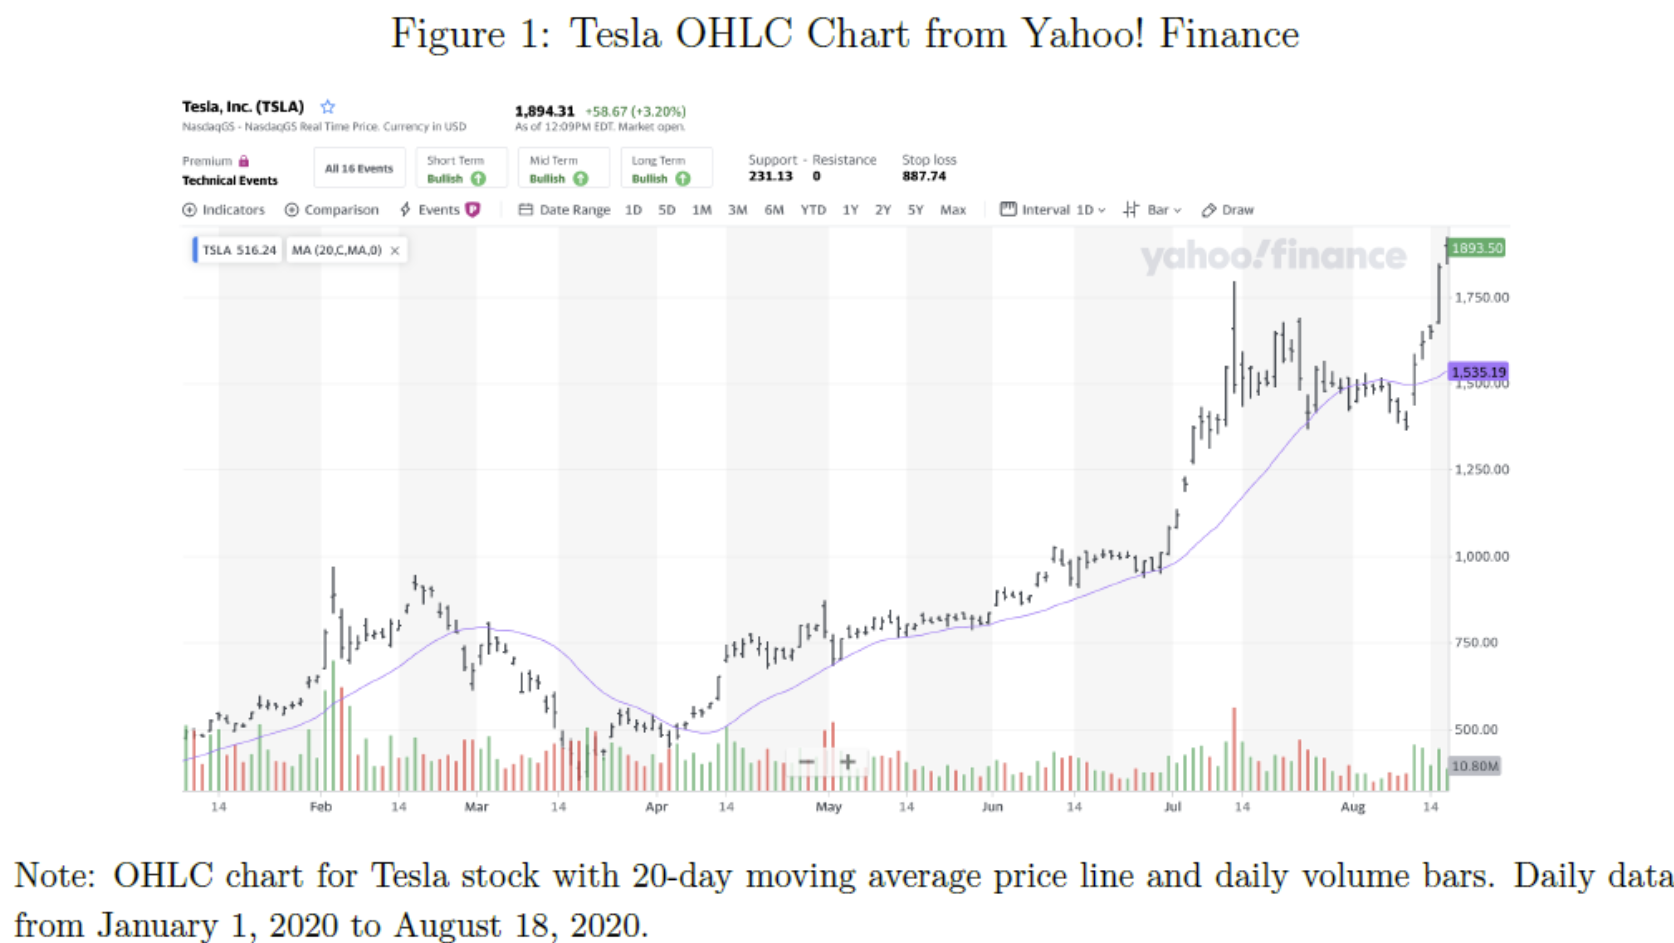

✅ 필요한 라이브러리 설치 (Colab & Jupyter Notebook 사용자)

In [13]:
!pip install yfinance pandas_datareader

✅ 1. yfinance를 이용한 주가 데이터 가져오기


https://finance.yahoo.com/quote/TSLA/

In [21]:
import yfinance as yf

# 종목 리스트
tickers = ["TSLA", "AAPL", "GOOGL", "AMZN", "MSFT"]  # 미국 주식
korean_tickers = ["005930.KQ", "000660.KQ", "035420.KQ"]  # 삼성전자, SK하이닉스, NAVER (한국 주식)

# 테슬라(TSLA) 주가 데이터 가져오기 (최근 2년치)
df_tesla = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
print(df_tesla.head())

# 애플(AAPL) 주가 가져오기
df_apple = yf.download("AAPL", start="2022-01-01", end="2025-09-30")
print(df_apple.head())

# 엔비디아(NVDA) 주가 가져오기
df_nvda = yf.download("NVDA", start="2022-01-01", end="2025-09-30")
print(df_apple.head())

# 여러 종목 동시 가져오기
df_multiple = yf.download(tickers, start="2022-01-01", end="2025-09-30")
print(df_multiple.head())


/tmp/ipython-input-318937794.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tesla = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-318937794.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_apple = yf.download("AAPL", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-318937794.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_nvda = yf.download("NVDA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-318937794.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_multiple = yf.download(tickers, start="2022-01-01", end="2025-09-30")
[                       0%                       ]

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.443130  179.296091  174.227410  174.345053  104487900
2022-01-04  176.178406  179.354917  175.609770  179.050994   99310400
2022-01-05  171.492096  176.639212  171.217584  176.090189   94537600
2022-01-06  168.6293

[*********************100%***********************]  5 of 5 completed

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2022-01-03  178.443130  170.404495  143.998322  324.504608  399.926666   
2022-01-04  176.178406  167.522003  143.410400  318.940277  383.196655   
2022-01-05  171.492096  164.356995  136.831253  306.696808  362.706665   
2022-01-06  168.629303  163.253998  136.803940  304.273376  354.899994   
2022-01-07  168.795959  162.554001  136.078461  304.428467  342.320007   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2022-01-03  179.296091  170.703506  144.851931  327.655138  400.356659  ...   
2022-01-04  179.354917  171.399994  145.481610  324.940827  402.666656  ...   
2022-01-05  

✅ 2. pandas_datareader를 이용한 주가 데이터 가져오기

In [22]:
import pandas_datareader.data as web
import datetime

start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2025, 9, 30)

# yfinance를 사용하여 야후에서 테슬라 데이터 가져오기
df_tesla_pdr = yf.download("TSLA", start=start_date, end=end_date)
print(df_tesla_pdr.head())


/tmp/ipython-input-3598898050.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tesla_pdr = yf.download("TSLA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


✅ 3. FinanceDataReader   
https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [23]:
!pip install -U finance-datareader

<Axes: >

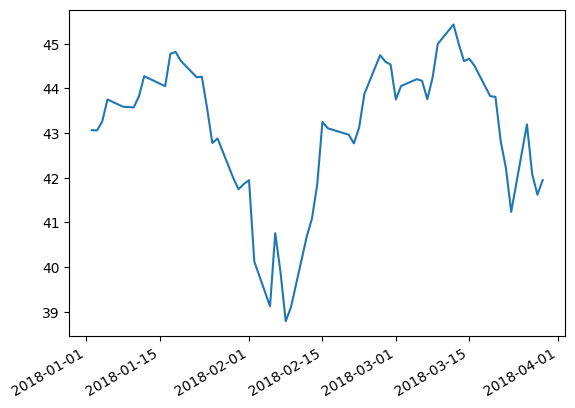

In [17]:
import FinanceDataReader as fdr
fdr.__version__

# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df['Close'].plot()



✅ 데이터 시각화


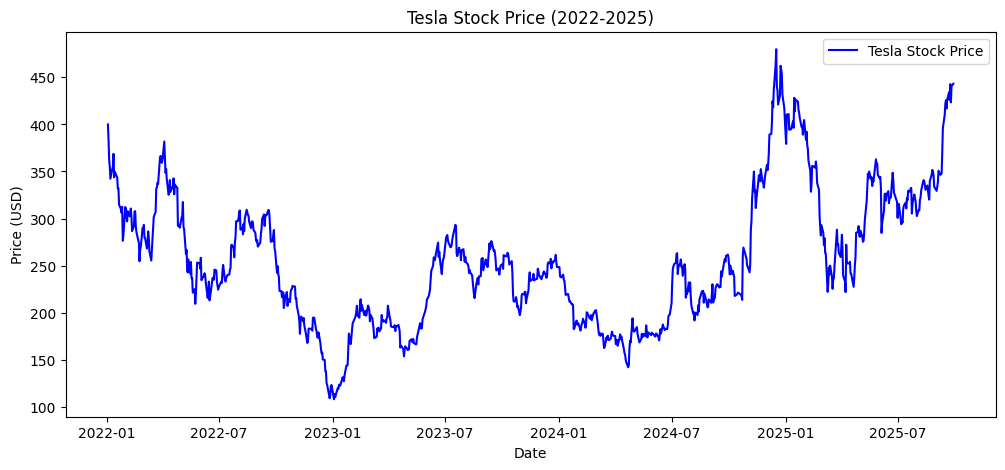

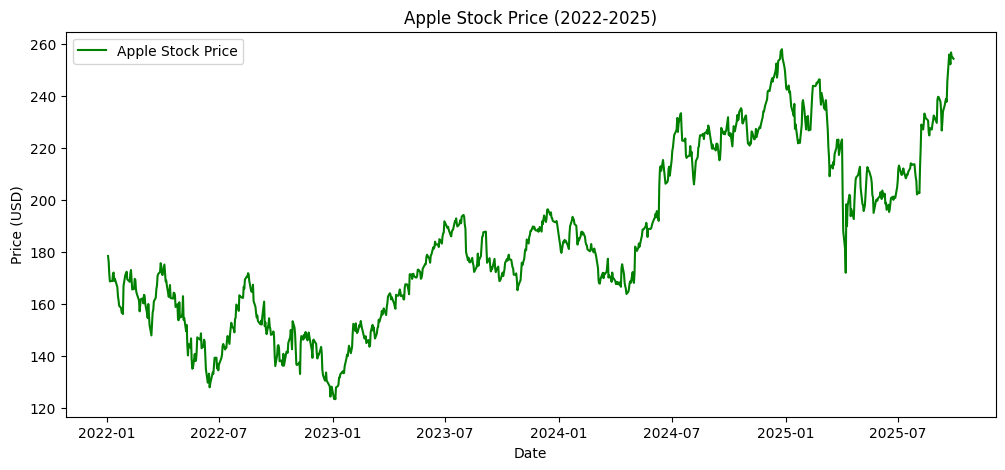

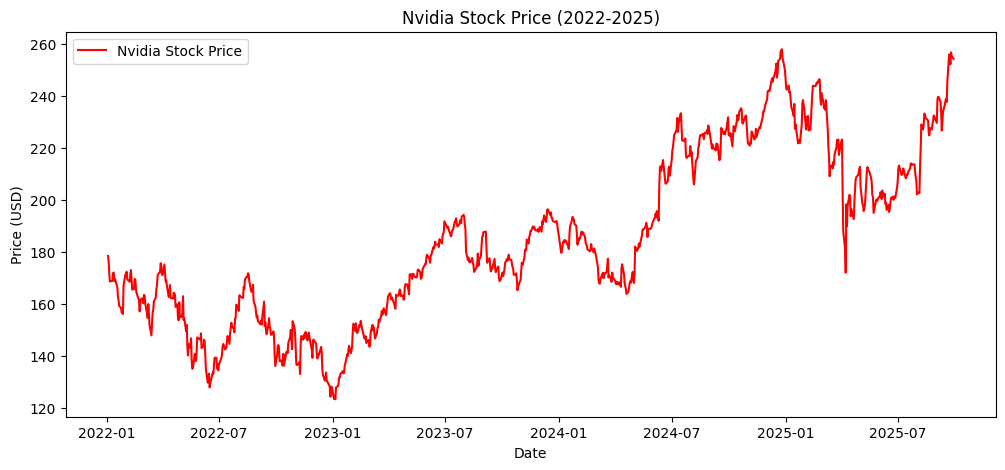

In [25]:
import matplotlib.pyplot as plt

# 테슬라 주가 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_tesla.index, df_tesla["Close"], label="Tesla Stock Price", color="blue")
plt.title("Tesla Stock Price (2022-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 애플 주가 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_apple.index, df_apple["Close"], label="Apple Stock Price", color="green")
plt.title("Apple Stock Price (2022-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 엔비디아 주가 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_nvda.index, df_apple["Close"], label="Nvidia Stock Price", color="red")
plt.title("Nvidia Stock Price (2022-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()